# Introduction to Graphs Theory with Python

## 1. Basic Graphs 

### 1.1 Libraries

In [2]:
# Libraries
import networkx as nx
import pygraphviz as pgv
from IPython.display import SVG
import pandas as pd
import matplotlib.pyplot as plt
import time

### 1.2 Graph Creation

In [3]:
G1=nx.Graph()
# Adding nodes:
G1.add_node("v1")
G1.add_node("v2")
G1.add_node("v3")
G1.add_node("v4")
G1.add_node("v5")
# Adding edges:
G1.add_edge("v1","v2",name="a1")
G1.add_edge("v1","v3",name="a2")
G1.add_edge("v2","v3",name="a3")
G1.add_edge("v2","v4",name="a4")
G1.add_edge("v2","v5",name="a6")
G1.add_edge("v3","v4",name="a5")
G1.add_edge("v3","v5",name="a7")

### 1.3 Showing the Graph

{('v1', 'v2'): Text(0.1198266239873384, -0.5406498952306596, 'a1'),
 ('v1', 'v3'): Text(0.19276692569990217, -0.27722075955365255, 'a2'),
 ('v2', 'v3'): Text(-0.07748963279992133, 0.020124127387195906, 'a3'),
 ('v2', 'v4'): Text(0.3072330743000979, 0.13781881250605818, 'a4'),
 ('v2', 'v5'): Text(-0.5752149672562425, 0.017749442902688622, 'a6'),
 ('v3', 'v4'): Text(0.38017337601266166, 0.4012479481830653, 'a5'),
 ('v3', 'v5'): Text(-0.5022746655436787, 0.28117857857969575, 'a7')}

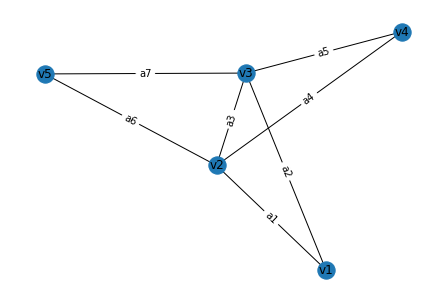

In [4]:
# Using Networkx + Matplotlib
# pos=spring layout
pos = nx.spring_layout(G1)
nx.draw(G1,pos,with_labels = True)
nx.draw_networkx_edge_labels(G1,pos,edge_labels=nx.get_edge_attributes(G1,'name'))

{('v1', 'v2'): Text(-0.6545085459947586, -0.4755282839152457, 'a1'),
 ('v1', 'v3'): Text(-0.09549137949943542, -0.2938925166937949, 'a2'),
 ('v2', 'v3'): Text(0.25000007450580597, -0.769420713186264, 'a3'),
 ('v2', 'v4'): Text(0.24999995529651642, -0.18163561820983887, 'a4'),
 ('v2', 'v5'): Text(-0.30901727080345154, -5.960464477539063e-08, 'a6'),
 ('v3', 'v4'): Text(0.8090171217918396, 1.4901161193847656e-07, 'a5'),
 ('v3', 'v5'): Text(0.24999989569187164, 0.18163570761680603, 'a7')}

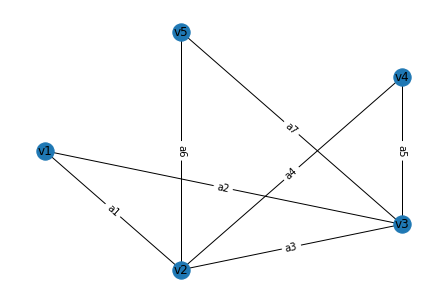

In [5]:
# Using Networkx + Matplotlib
# pos=shell layout
pos = nx.shell_layout(G1)
nx.draw(G1,pos,with_labels = True)
nx.draw_networkx_edge_labels(G1,pos,edge_labels=nx.get_edge_attributes(G1,'name'))

In [8]:
# Using Pygraphviz
A = nx.nx_agraph.to_agraph(G1)
A.layout('dot')
A.draw('results/web.svg')

### 1.4. Persistence

A graph in Networkx (an object in temporal memory) can be saved as a file with the following formats: GML, JSON, Pajek, YAML, Pickle. To do that, the "write" function can be used.

#### Saving graph with pickle

In [9]:
# Saving to Pickle format
fileName="files/G1.pkl"
nx.write_gpickle(G1, fileName)

#### Loading graph from pickle file

In [10]:
# Delay: 1 seg.
time.sleep(1)
# Restoring the graph from file
G2=nx.read_gpickle(fileName)
# Note that we restored the graph with a different name. Thus you can check that 
# this is a restored graph from file and not a copy of the one in memory

#### Showing restored graph

{('v1', 'v2'): Text(-0.6545085459947586, -0.4755282839152457, 'a1'),
 ('v1', 'v3'): Text(-0.09549137949943542, -0.2938925166937949, 'a2'),
 ('v2', 'v3'): Text(0.25000007450580597, -0.769420713186264, 'a3'),
 ('v2', 'v4'): Text(0.24999995529651642, -0.18163561820983887, 'a4'),
 ('v2', 'v5'): Text(-0.30901727080345154, -5.960464477539063e-08, 'a6'),
 ('v3', 'v4'): Text(0.8090171217918396, 1.4901161193847656e-07, 'a5'),
 ('v3', 'v5'): Text(0.24999989569187164, 0.18163570761680603, 'a7')}

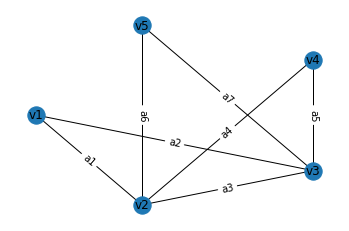

In [18]:
# Restored Graph
nx.draw(G2,pos,with_labels = True) 
# Note that we use the same pos in order to have the graph in the same place.
nx.draw_networkx_edge_labels(G2,pos,edge_labels=nx.get_edge_attributes(G2,'name'))

### 1.5. Position

In [11]:
pos = {'v1':(10, 10),
 'v2':(7.5, 7.5), 'v3':(12.5, 7.5),
 'v4':(6, 6), 'v5':(9, 6)}

### 1.6. Changing Styles

{'v1': Text(10, 10, 'v1'),
 'v2': Text(7.5, 7.5, 'v2'),
 'v3': Text(12.5, 7.5, 'v3'),
 'v4': Text(6, 6, 'v4'),
 'v5': Text(9, 6, 'v5')}

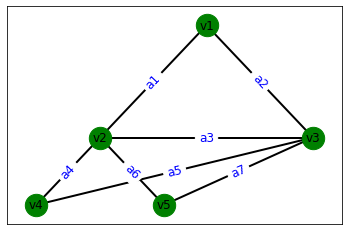

In [12]:
# Styles:
nx.draw_networkx_nodes(G2, pos, node_size=500, node_color='green') #nodes
nx.draw_networkx_edges(G2, pos, width=2, alpha=1, edge_color='black')
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):G2[u][v]['name'] for u,v in G2.edges()} ,font_color='blue',font_size=12)
nx.draw_networkx_labels(G2, pos, font_size=12, font_family='sans-serif') 

### 1.7. Connectivity

In [13]:
# Show if graph is or not connected:
print('The graph is connected: ',nx.is_connected(G2))

The graph is connected:  True


In [14]:
# Number of connected components of the graph:
print('Number of connected components: ',nx.number_connected_components(G2))

Number of connected components:  1


## 2. Nodes and Edges

### 2.1. Nodes and Edges with Pandas

In [15]:
# Dataframe with nodes and edges
dfGraph=pd.DataFrame(nx.get_edge_attributes(G2, "name").items(), columns=["nodes","edges"])
print(dfGraph)

      nodes edges
0  (v1, v2)    a1
1  (v1, v3)    a2
2  (v2, v3)    a3
3  (v2, v4)    a4
4  (v2, v5)    a6
5  (v3, v4)    a5
6  (v3, v5)    a7


### 2.2. About Nodes

In [16]:
# Nodes
print('Nodes of the graph:',G2.nodes)
print('Number of Nodes:', G2.order())
# Degree:
print('Degree of Nodes: ',G2.degree())
print('Degree of each Node:', G2.degree('v1'))

Nodes of the graph: ['v1', 'v2', 'v3', 'v4', 'v5']
Number of Nodes: 5
Degree of Nodes:  [('v1', 2), ('v2', 4), ('v3', 4), ('v4', 2), ('v5', 2)]
Degree of each Node: 2


### 2.3. About Edges

In [17]:
# Edges
print('The edges: ',G2.edges())
print('Includding Names: ',nx.get_edge_attributes(G2,'name'))

The edges:  [('v1', 'v2'), ('v1', 'v3'), ('v2', 'v3'), ('v2', 'v4'), ('v2', 'v5'), ('v3', 'v4'), ('v3', 'v5')]
Includding Names:  {('v1', 'v2'): 'a1', ('v1', 'v3'): 'a2', ('v2', 'v3'): 'a3', ('v2', 'v4'): 'a4', ('v2', 'v5'): 'a6', ('v3', 'v4'): 'a5', ('v3', 'v5'): 'a7'}


## 3. Matrix representation

### 3.1. Adjacency Matrix

In [18]:
A=nx.adjacency_matrix(G2)
A.todense()

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0]])

### 3.2. Graph from Adjacency Matrix

Graph with 5 nodes and 7 edges


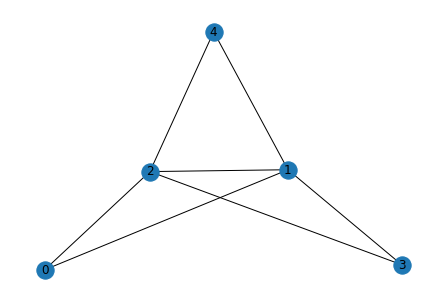

In [19]:
# Restore Graph from matrix
H = nx.from_numpy_matrix(A)
print(H)
pos = nx.spring_layout(H)
nx.draw(H,pos,with_labels = True)

## 4. Euler

### 4.1. Degree: ¿The graph admits or not Eulerian path/cycle?

A graph admits an eulerian cycle if is connected and the degree of all nodes is even. In the same way, a graph admits an eulerian path if the degree of all nodes is even except the starting and ending ones that have odd degree.

In [20]:
degree=H.degree()
for i in range(len(degree)):
    print('Degree(',i,')=',degree[i])

Degree( 0 )= 2
Degree( 1 )= 4
Degree( 2 )= 4
Degree( 3 )= 2
Degree( 4 )= 2


### 4.2. ¿Admits an eulerian path?

In [21]:
# Test if graph admits eulerian path from Networkx.
resCAe=nx.is_semieulerian(H)
print('Admits Euleriano path? ',resCAe)  

Admits Euleriano path?  False


In [22]:
if(resCAe):
    CSe=list(nx.eulerian_path(H,source=None))
    print('Eulerian_path=',CAe)
else:
    print('The graph NOT admits an Eulerian path')    

The graph NOT admits an Eulerian path


### 4.3. ¿Admits an eulerian cycle?

In [23]:
# tests if the graph admits an eulerian cycle from Networkx.
resCIe=nx.is_eulerian(H)
print('Admits an Eulerian cycle? ',resCIe)

Admits an Eulerian cycle?  True


In [24]:
if(resCIe):
    CIe=list(nx.eulerian_circuit(H,source=None))
    print('Eulerian_Cycle=',CIe)
else:
    print('The graph NOT admits an Eulerian cycle')

Eulerian_Cycle= [(0, 2), (2, 4), (4, 1), (1, 3), (3, 2), (2, 1), (1, 0)]


## 5. Other Graphs

### 5.1. Complete graphs

A complete graph is a graph that have n nodes where the degree of each node is n-1. In other words, each node is connected with all the other ones.

In [25]:
# The value of n:
n=6
C=nx.complete_graph(n)
pos = nx.spring_layout(C)

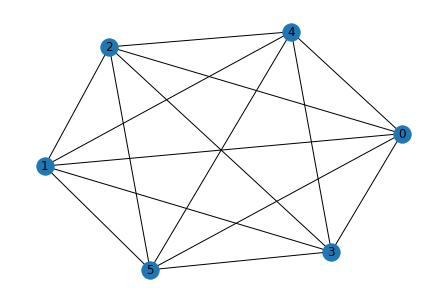

In [26]:
nodesC=list(C.edges)
edgesC=[]    
for i in range(len(nodesC)):
    edge=str('a')+str(nodesC[i][0])+str(nodesC[i][1])
    edgesC.append(edge)
names = []
nx.set_edge_attributes(C, names, "names")
names = edgesC
dfGrafoC=pd.DataFrame(nodesC, columns=["nodes","edges"])
nx.draw(C,pos,with_labels = True)

### 5.2. Hyper-cube graphs

The hypercube Qn is a regular graph with 2(exp n) nodes. Each node of Qn is incident into exactly n edges (therefore the graph is n-regular) and thus, the number of edges is 2 (exp n-1)n.

In [27]:
# The value of n:
n=4
HQ=nx.hypercube_graph(n)
pos = nx.spring_layout(HQ)

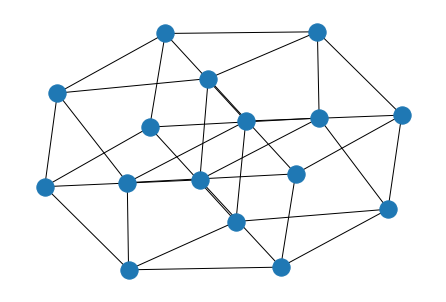

In [28]:
nodesHQ=list(HQ.edges)
edgesHQ=[]    
for i in range(len(nodesHQ)):
    edge=str('a')+str(nodesHQ[i][0])+str(nodesHQ[i][1])
    edgesHQ.append(edge)
names = []
nx.set_edge_attributes(C, names, "names")
names = edgesHQ
dfGrafoHQ=pd.DataFrame(nodesHQ, columns=["nodes","edges"])
nx.draw(HQ,pos,with_labels = False)